In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [43]:
loan_statement = pd.read_csv('data/ibrd-statement-of-loans-historical-data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12,13,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


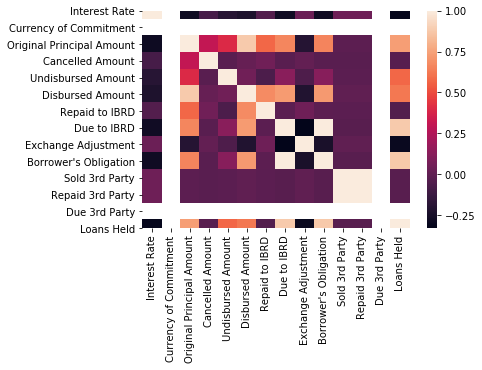

In [44]:
sns.heatmap(loan_statement.corr())

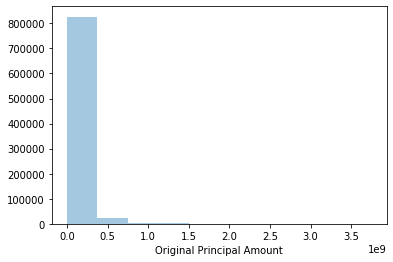

In [47]:
sns.distplot(loan_statement['Original Principal Amount'],kde=False,bins=10)

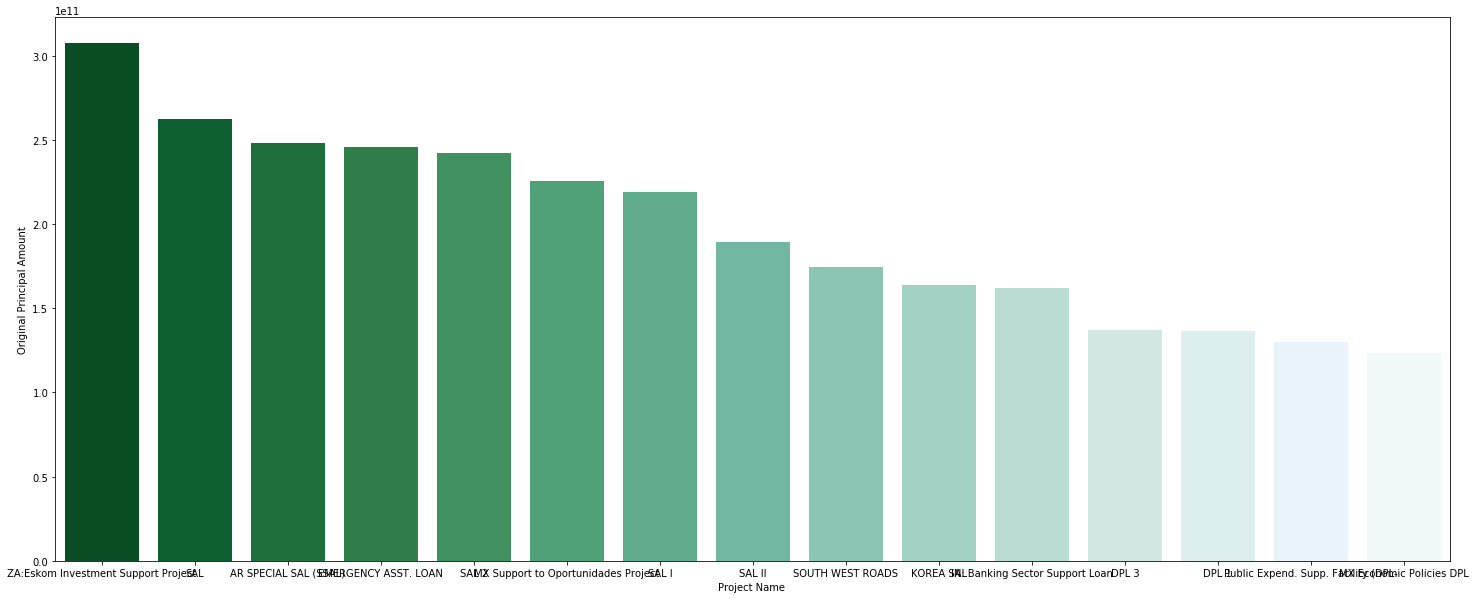

In [53]:
plt.figure(figsize=(25, 10))
sns.barplot(x='Project Name ', y='Original Principal Amount', palette='BuGn_r', data=loan_statement.loc[:,['Project Name ','Original Principal Amount']].groupby(['Project Name '], as_index=False).sum().sort_values(by='Original Principal Amount', ascending=False).head(15))

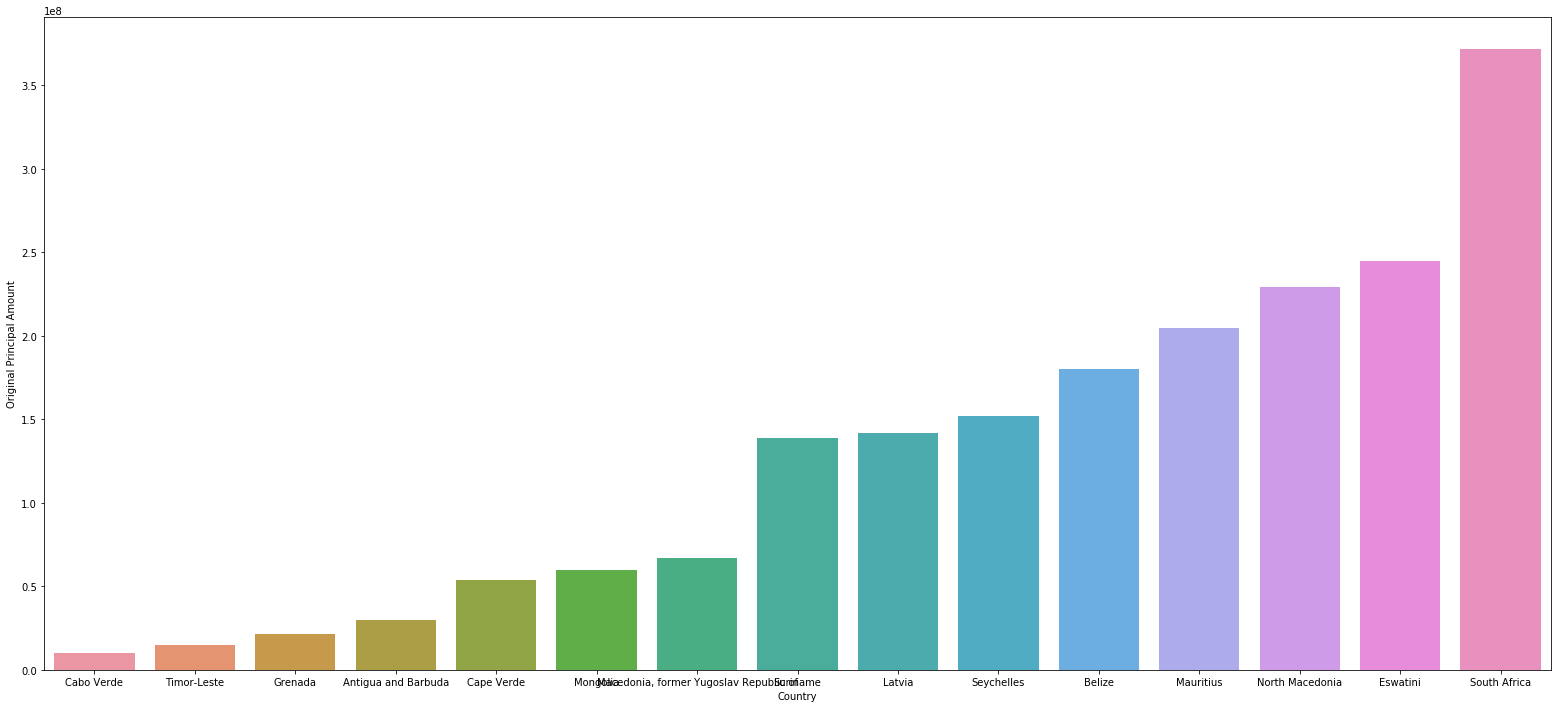

In [59]:
plt.figure(figsize=(27, 12))
sns.barplot(x='Country', y='Original Principal Amount', data=loan_statement.loc[(loan_statement['Loan Status'] == 'Approved'),['Country','Original Principal Amount']].groupby(['Country'], as_index=False).sum().sort_values(by='Original Principal Amount', ascending=True).head(15))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


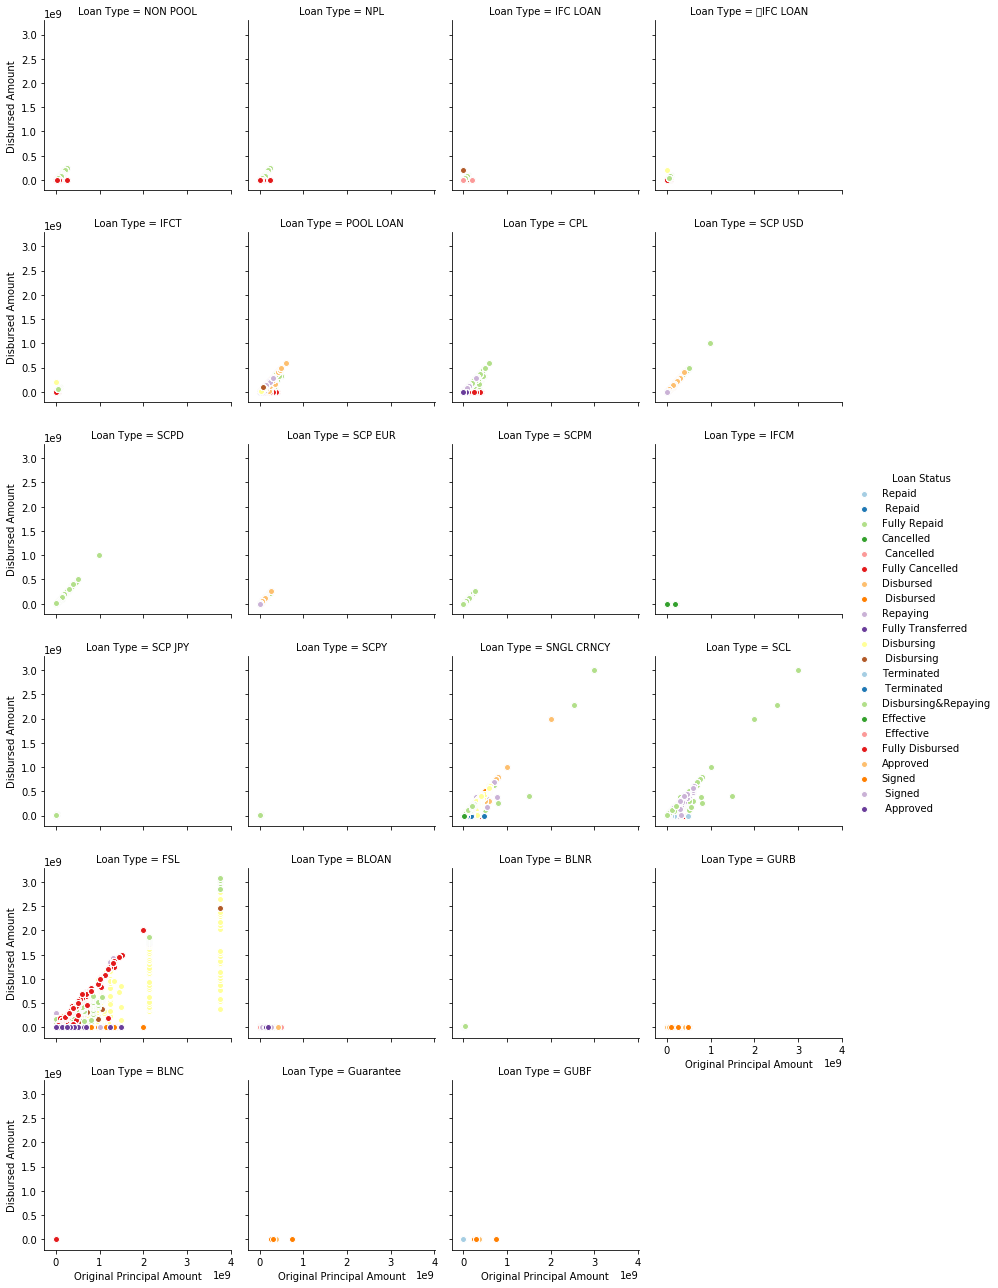

In [61]:
g = sns.FacetGrid(loan_statement,  hue="Loan Status", col="Loan Type", margin_titles=True,  col_wrap=4, palette='Paired')
g=g.map(plt.scatter, "Original Principal Amount", "Disbursed Amount",edgecolor="w").add_legend();
plt.show()

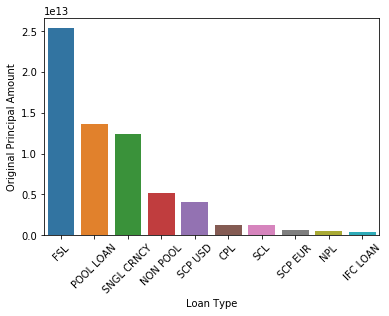

In [72]:
sns.barplot(x='Loan Type', y='Original Principal Amount', data=loan_statement.loc[:,['Loan Type','Original Principal Amount']].groupby(['Loan Type'], as_index=False).sum().sort_values(by='Original Principal Amount', ascending=False).head(10))
plt.xticks(rotation=45)
plt.show()

In [81]:
#extracting only the independent variables
x = loan_statement.iloc[:,[14,15,16,17]].values

In [82]:
x

array([[2.5e+08, 0.0e+00, 0.0e+00, 2.5e+08],
       [2.5e+08, 0.0e+00, 0.0e+00, 2.5e+08],
       [2.5e+08, 0.0e+00, 0.0e+00, 2.5e+08],
       ...,
       [1.0e+07, 0.0e+00, 0.0e+00, 1.0e+07],
       [1.0e+07, 0.0e+00, 0.0e+00, 1.0e+07],
       [1.0e+07, 0.0e+00, 0.0e+00, 1.0e+07]])

In [83]:
y = loan_statement.iloc[:,18].values

In [84]:
y

array([   38000.,    38000.,    38000., ..., 10000000., 10000000.,
       10000000.])

In [90]:
#splitting the dataset into the Training and the test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [88]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [91]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
y_pred = lr.predict(x_test)
y_pred

array([12663107.52719175, 48650045.38139755, 18838726.28274926, ...,
       20463835.00421523, 16767015.1317428 , -3477767.23551712])

In [98]:
#calculating the residuals
from sklearn import metrics
print('MAE ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE ',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

MAE  26856091.40561434
MSE  4210490549339073.0
RMSE  5182.28631065617
